# Axis Bank Stock Data Analysis Project Blog Post
> Data Analysis of axis bank stock market time-series dataset.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/stockdataimg.jpg

## AxisBank Stock Data Analysis

The project is based on the dataset I obtained from kaggle. The Analysis I am performing is on the 'AXISBANK' stock market data  from 2019-2021.AXISBANK is one of the stocks listed in NIFTY50 index. The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange. It is one of the two main stock indices used in India, the other being the BSE SENSEX. The Analysis is performed on the stock quote data of "AXIS BANK" from the dataset of NIFTY50 Stock Market data obtained from kaggle repo. 

Axis Bank Limited, formerly known as UTI Bank (1993–2007), is an Indian banking and financial services company headquartered in Mumbai, Maharashtra.It sells financial services to large and mid-size companies, SMEs and retail businesses.

The bank was founded on 3 December 1993 as UTI Bank, opening its registered office in Ahmedabad and a corporate office in Mumbai. The bank was promoted jointly by the Administrator of the Unit Trust of India (UTI), Life Insurance Corporation of India (LIC), General Insurance Corporation, National Insurance Company, The New India Assurance Company, The Oriental Insurance Corporation and United India Insurance Company. The first branch was inaugurated on 2 April 1994 in Ahmedabad by Manmohan Singh, then finance minister of India \
I chose this dataset because of the importance of NIFTY50 listed stocks on Indian economy. In most ways the NIFTY50 presents how well the Indian capital markets are doing.


## Downloading the Dataset

In this section of the Jupyter notebook we are going to download an interesting data set from kaggle dataset repositories. We are using python library called OpenDatasets for downloading from kaggle. While downloading we are asked for kaggle user id and API token key for accessing the dataset from kaggle. Kaggle is a platform used for obtaining datasets and various other datascience tasks. 

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/rohanrao/nifty50-stock-market-data'

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sandeshkatakam
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 18.4M/18.4M [00:02<00:00, 9.29MB/s]


The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './nifty50-stock-market-data'

In [5]:
import os
os.listdir(data_dir)

['ADANIPORTS.csv',
 'ASIANPAINT.csv',
 'AXISBANK.csv',
 'BAJAJ-AUTO.csv',
 'BAJAJFINSV.csv',
 'BAJFINANCE.csv',
 'BHARTIARTL.csv',
 'BPCL.csv',
 'BRITANNIA.csv',
 'CIPLA.csv',
 'COALINDIA.csv',
 'DRREDDY.csv',
 'EICHERMOT.csv',
 'GAIL.csv',
 'GRASIM.csv',
 'HCLTECH.csv',
 'HDFC.csv',
 'HDFCBANK.csv',
 'HEROMOTOCO.csv',
 'HINDALCO.csv',
 'HINDUNILVR.csv',
 'ICICIBANK.csv',
 'INDUSINDBK.csv',
 'INFRATEL.csv',
 'INFY.csv',
 'IOC.csv',
 'ITC.csv',
 'JSWSTEEL.csv',
 'KOTAKBANK.csv',
 'LT.csv',
 'MARUTI.csv',
 'MM.csv',
 'NESTLEIND.csv',
 'NIFTY50_all.csv',
 'NTPC.csv',
 'ONGC.csv',
 'POWERGRID.csv',
 'RELIANCE.csv',
 'SBIN.csv',
 'SHREECEM.csv',
 'stock_metadata.csv',
 'SUNPHARMA.csv',
 'TATAMOTORS.csv',
 'TATASTEEL.csv',
 'TCS.csv',
 'TECHM.csv',
 'TITAN.csv',
 'ULTRACEMCO.csv',
 'UPL.csv',
 'VEDL.csv',
 'WIPRO.csv',
 'ZEEL.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "nifty50-stockmarket-data" # change this (use lowercase letters and hyphens only)

## Data Preparation and Cleaning

Data Preparation and Cleansing constitutes the first part of the Data Analysis project for any dataset. We do this process inorder to obtain retain valuable data from the data frame, one that is relevant for our analysis. The process is also used to remove erroneous values from the dataset(ex. NaN to 0). After the preparation of data and cleansing, the data can be used for analysis.</br>
In our dataframe we have a lot of non-releavant information, so we are going to drop few columns in the dataframe and fix some of the elements in data frame for better analysis. We are also going to change the Date column into DateTime format which can be further used to group the data by months/year.



In [7]:
import pandas as pd
import numpy as np


In [8]:
axis_df= pd.read_csv(data_dir + "/AXISBANK.csv")

In [9]:
axis_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [10]:
axis_df.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,585.763852,586.507388,596.476187,575.571598,585.897399,585.893931,586.077778,4.527938e+06,2.739871e+14,120602.231678,1.990907e+06,0.466962
std,436.714128,436.602194,443.044833,430.108921,436.609147,436.649765,436.611987,8.101940e+06,4.122431e+14,96106.654046,3.264587e+06,0.161808
min,22.150000,21.000000,23.700000,21.000000,22.150000,22.150000,22.170000,2.850000e+03,8.275250e+09,2698.000000,5.809000e+03,0.075000
25%,230.950000,232.000000,235.125000,227.075000,230.550000,230.975000,231.115000,2.842172e+05,5.868745e+12,62228.250000,2.573130e+05,0.347500
50%,519.450000,520.100000,528.400000,512.025000,519.425000,519.500000,519.505000,1.656966e+06,1.653257e+14,93186.500000,7.687680e+05,0.459800
75%,877.312500,880.075000,897.987500,852.762500,877.275000,877.312500,875.807500,5.515245e+06,3.456528e+14,144973.250000,2.652520e+06,0.573900
max,2023.350000,2034.400000,2043.050000,2002.600000,2022.550000,2023.350000,2020.310000,1.205419e+08,7.179550e+15,990737.000000,9.490116e+07,0.983000


In [11]:
axis_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.70,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.00,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.40,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.90,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.00,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,286480.0,5949937.0,0.2749
5302,2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,289445.0,18080082.0,0.3883
5303,2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,507747.0,17851331.0,0.3302
5304,2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,312079.0,7357520.0,0.2836


In [12]:
axis_df['Symbol'] = np.where(axis_df['Symbol'] == 'UTIBANK', 'AXISBANK', axis_df['Symbol'])
axis_df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,AXISBANK,EQ,24.70,26.7,26.70,26.70,26.70,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,AXISBANK,EQ,26.70,27.0,28.70,26.50,27.00,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,AXISBANK,EQ,26.85,26.0,27.75,25.50,26.40,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,AXISBANK,EQ,26.30,25.8,27.00,25.80,25.90,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,AXISBANK,EQ,25.95,25.0,26.00,24.25,25.00,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,286480.0,5949937.0,0.2749
5302,2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,289445.0,18080082.0,0.3883
5303,2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,507747.0,17851331.0,0.3302
5304,2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,312079.0,7357520.0,0.2836


In [13]:
axis_new_df = axis_df.drop(['Last','Series', 'VWAP', 'Trades','Deliverable Volume','%Deliverble'], axis=1)

axis_new_df

,Date,Symbol,Prev Close,Open,High,Low,Close,Volume,Turnover
0,2000-01-03,AXISBANK,24.70,26.7,26.70,26.70,26.70,112100,2.993070e+11
1,2000-01-04,AXISBANK,26.70,27.0,28.70,26.50,26.85,234500,6.387275e+11
2,2000-01-05,AXISBANK,26.85,26.0,27.75,25.50,26.30,170100,4.462980e+11
3,2000-01-06,AXISBANK,26.30,25.8,27.00,25.80,25.95,102100,2.681730e+11
4,2000-01-07,AXISBANK,25.95,25.0,26.00,24.25,24.80,62600,1.567220e+11
...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,AXISBANK,671.35,694.0,703.80,684.50,700.45,21646184,1.505120e+15
5302,2021-04-27,AXISBANK,700.45,691.1,703.90,684.10,699.55,46559967,3.225830e+15
5303,2021-04-28,AXISBANK,699.55,708.0,712.50,688.15,708.15,54060587,3.794635e+15
5304,2021-04-29,AXISBANK,708.15,712.0,726.90,707.00,719.40,25939327,1.860920e+15


In [14]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos


In [15]:
listOfPosition_axis = getIndexes(axis_df, '2019-01-01')
listOfPosition_axis

[(4729, 'Date')]

In [16]:
axis_new_df.drop(axis_new_df.loc[0:4728].index, inplace = True)

In [17]:
axis_new_df

,Date,Symbol,Prev Close,Open,High,Low,Close,Volume,Turnover
4729,2019-01-01,AXISBANK,619.90,621.9,630.20,621.90,627.30,12179223,7.609460e+14
4730,2019-01-02,AXISBANK,627.30,623.0,628.50,617.50,620.05,12386281,7.720546e+14
4731,2019-01-03,AXISBANK,620.05,621.4,622.00,603.65,607.95,13228602,8.092834e+14
4732,2019-01-04,AXISBANK,607.95,612.0,624.75,609.50,619.60,8381367,5.178678e+14
4733,2019-01-07,AXISBANK,619.60,626.0,640.70,624.20,637.45,11735286,7.463059e+14
...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,AXISBANK,671.35,694.0,703.80,684.50,700.45,21646184,1.505120e+15
5302,2021-04-27,AXISBANK,700.45,691.1,703.90,684.10,699.55,46559967,3.225830e+15
5303,2021-04-28,AXISBANK,699.55,708.0,712.50,688.15,708.15,54060587,3.794635e+15
5304,2021-04-29,AXISBANK,708.15,712.0,726.90,707.00,719.40,25939327,1.860920e+15


## Summary of the operations done till now:
1. we have taken a csv file containing stock data of AXIS BANK from the data set of nifty50 stocks and performed data cleansing operations on them.</br>
2. Originally, the data from the data set is noticed as stock price quotations from the year 2001 but for our analysis we have taken data for the years 2019-2021</br>
3. Then we have dropped the columns that are not relevant for our analysis by using pandas dataframe operations.

In [18]:
axis_new_df.reset_index(drop=True, inplace=True)
axis_new_df

,Date,Symbol,Prev Close,Open,High,Low,Close,Volume,Turnover
0,2019-01-01,AXISBANK,619.90,621.9,630.20,621.90,627.30,12179223,7.609460e+14
1,2019-01-02,AXISBANK,627.30,623.0,628.50,617.50,620.05,12386281,7.720546e+14
2,2019-01-03,AXISBANK,620.05,621.4,622.00,603.65,607.95,13228602,8.092834e+14
3,2019-01-04,AXISBANK,607.95,612.0,624.75,609.50,619.60,8381367,5.178678e+14
4,2019-01-07,AXISBANK,619.60,626.0,640.70,624.20,637.45,11735286,7.463059e+14
...,...,...,...,...,...,...,...,...,...
572,2021-04-26,AXISBANK,671.35,694.0,703.80,684.50,700.45,21646184,1.505120e+15
573,2021-04-27,AXISBANK,700.45,691.1,703.90,684.10,699.55,46559967,3.225830e+15
574,2021-04-28,AXISBANK,699.55,708.0,712.50,688.15,708.15,54060587,3.794635e+15
575,2021-04-29,AXISBANK,708.15,712.0,726.90,707.00,719.40,25939327,1.860920e+15


In [19]:
axis_new_df['Date'] = pd.to_datetime(axis_new_df['Date']) # we changed the Dates into Datetime format from the object format
axis_new_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        577 non-null    datetime64[ns]
 1   Symbol      577 non-null    object        
 2   Prev Close  577 non-null    float64       
 3   Open        577 non-null    float64       
 4   High        577 non-null    float64       
 5   Low         577 non-null    float64       
 6   Close       577 non-null    float64       
 7   Volume      577 non-null    int64         
 8   Turnover    577 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 40.7+ KB


In [20]:
axis_new_df['Daily Lag'] = axis_new_df['Close'].shift(1) # Added a new column Daily Lag to calculate daily returns of the stock
axis_new_df['Daily Returns'] = (axis_new_df['Daily Lag']/axis_new_df['Close']) -1


In [21]:
axis_dailyret_df = axis_new_df.drop(['Prev Close', 'Open','High', 'Low','Close','Daily Lag'], axis = 1)

In [22]:
axis_dailyret_df

,Date,Symbol,Volume,Turnover,Daily Returns
0,2019-01-01,AXISBANK,12179223,7.609460e+14,NaN
1,2019-01-02,AXISBANK,12386281,7.720546e+14,0.011693
2,2019-01-03,AXISBANK,13228602,8.092834e+14,0.019903
3,2019-01-04,AXISBANK,8381367,5.178678e+14,-0.018802
4,2019-01-07,AXISBANK,11735286,7.463059e+14,-0.028002
...,...,...,...,...,...
572,2021-04-26,AXISBANK,21646184,1.505120e+15,-0.041545
573,2021-04-27,AXISBANK,46559967,3.225830e+15,0.001287
574,2021-04-28,AXISBANK,54060587,3.794635e+15,-0.012144
575,2021-04-29,AXISBANK,25939327,1.860920e+15,-0.015638


## Exploratory Analysis and Visualization


#### Here we compute the mean, max/min stock quotes of the stock  AXISBANK. We specifically compute the mean of  the Daily returns column. we are going to do the analysis by first converting the index datewise to month wise to have a good consolidated dataframe to analyze in broad timeline. we are going to divide the data frame into three for the years 2019, 2020, 2021 respectively, in order to analyze the yearly performance of the stock.


Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Here we are going to explore the daily Returns column by plotting a line graph of daily returns v/s Months. Now we can see that daily returns are growing across months in the years 2019-2021.

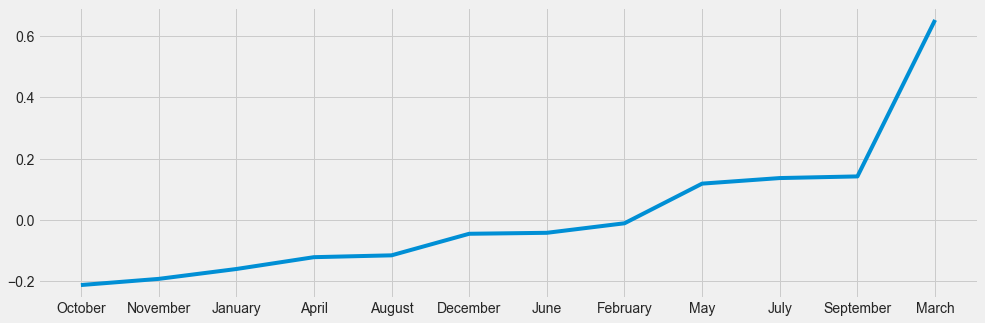

In [57]:
plt.style.use('fivethirtyeight')
axis_dailyret_plot=axis_dailyret_df.groupby(axis_dailyret_df['Date'].dt.strftime('%B'))['Daily Returns'].sum().sort_values()
plt.plot(axis_dailyret_plot)

In [25]:
axis_new_df['Year'] = pd.DatetimeIndex(axis_new_df['Date']).year
axis_new_df


,Date,Symbol,Prev Close,Open,High,Low,Close,Volume,Turnover,Daily Lag,Daily Returns,Year
0,2019-01-01,AXISBANK,619.90,621.9,630.20,621.90,627.30,12179223,7.609460e+14,NaN,NaN,2019
1,2019-01-02,AXISBANK,627.30,623.0,628.50,617.50,620.05,12386281,7.720546e+14,627.30,0.011693,2019
2,2019-01-03,AXISBANK,620.05,621.4,622.00,603.65,607.95,13228602,8.092834e+14,620.05,0.019903,2019
3,2019-01-04,AXISBANK,607.95,612.0,624.75,609.50,619.60,8381367,5.178678e+14,607.95,-0.018802,2019
4,2019-01-07,AXISBANK,619.60,626.0,640.70,624.20,637.45,11735286,7.463059e+14,619.60,-0.028002,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
572,2021-04-26,AXISBANK,671.35,694.0,703.80,684.50,700.45,21646184,1.505120e+15,671.35,-0.041545,2021
573,2021-04-27,AXISBANK,700.45,691.1,703.90,684.10,699.55,46559967,3.225830e+15,700.45,0.001287,2021
574,2021-04-28,AXISBANK,699.55,708.0,712.50,688.15,708.15,54060587,3.794635e+15,699.55,-0.012144,2021
575,2021-04-29,AXISBANK,708.15,712.0,726.90,707.00,719.40,25939327,1.860920e+15,708.15,-0.015638,2021


In [26]:
axis2019_df = axis_new_df[axis_new_df.Year == 2019 ]
axis2020_df = axis_new_df[axis_new_df.Year == 2020 ]
axis2021_df = axis_new_df[axis_new_df.Year == 2021 ]

In [27]:
axis2019_df.reset_index(drop = True, inplace = True)
axis2019_df

,Date,Symbol,Prev Close,Open,High,Low,Close,Volume,Turnover,Daily Lag,Daily Returns,Year
0,2019-01-01,AXISBANK,619.90,621.90,630.20,621.90,627.30,12179223,7.609460e+14,NaN,NaN,2019
1,2019-01-02,AXISBANK,627.30,623.00,628.50,617.50,620.05,12386281,7.720546e+14,627.30,0.011693,2019
2,2019-01-03,AXISBANK,620.05,621.40,622.00,603.65,607.95,13228602,8.092834e+14,620.05,0.019903,2019
3,2019-01-04,AXISBANK,607.95,612.00,624.75,609.50,619.60,8381367,5.178678e+14,607.95,-0.018802,2019
4,2019-01-07,AXISBANK,619.60,626.00,640.70,624.20,637.45,11735286,7.463059e+14,619.60,-0.028002,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
240,2019-12-24,AXISBANK,743.15,744.50,744.70,737.80,740.65,3642916,2.698164e+14,743.15,0.003375,2019
241,2019-12-26,AXISBANK,740.65,737.50,740.65,733.90,736.50,7919368,5.836254e+14,740.65,0.005635,2019
242,2019-12-27,AXISBANK,736.50,739.00,762.00,736.30,760.15,10736285,8.089429e+14,736.50,-0.031112,2019
243,2019-12-30,AXISBANK,760.15,760.90,765.75,751.05,754.10,10034206,7.598128e+14,760.15,0.008023,2019


In [28]:
axis2020_df.reset_index(drop = True, inplace = True)
axis2020_df

,Date,Symbol,Prev Close,Open,High,Low,Close,Volume,Turnover,Daily Lag,Daily Returns,Year
0,2020-01-01,AXISBANK,754.10,754.90,759.95,747.20,748.70,4917748,3.697221e+14,754.10,0.007213,2020
1,2020-01-02,AXISBANK,748.70,750.00,759.00,747.60,756.95,5156046,3.886739e+14,748.70,-0.010899,2020
2,2020-01-03,AXISBANK,756.95,753.15,756.25,740.50,742.95,8489729,6.336165e+14,756.95,0.018844,2020
3,2020-01-06,AXISBANK,742.95,739.45,739.60,721.70,723.25,6356198,4.631502e+14,742.95,0.027238,2020
4,2020-01-07,AXISBANK,723.25,728.00,738.00,721.05,725.75,9103360,6.630907e+14,723.25,-0.003445,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-12-24,AXISBANK,592.45,595.00,614.00,594.15,610.20,15488083,9.422775e+14,592.45,-0.029089,2020
248,2020-12-28,AXISBANK,610.20,614.00,620.80,614.00,617.65,8444506,5.220025e+14,610.20,-0.012062,2020
249,2020-12-29,AXISBANK,617.65,620.70,632.40,618.60,630.20,13765454,8.632919e+14,617.65,-0.019914,2020
250,2020-12-30,AXISBANK,630.20,632.25,634.00,618.20,625.10,10262221,6.407812e+14,630.20,0.008159,2020


In [29]:
axis2021_df.reset_index(drop=True, inplace=True)
axis2021_df

,Date,Symbol,Prev Close,Open,High,Low,Close,Volume,Turnover,Daily Lag,Daily Returns,Year
0,2021-01-01,AXISBANK,620.45,620.25,625.45,617.55,623.80,6047062,3.762202e+14,620.45,-0.005370,2021
1,2021-01-04,AXISBANK,623.80,627.80,633.00,621.30,624.70,14068156,8.811802e+14,623.80,-0.001441,2021
2,2021-01-05,AXISBANK,624.70,618.00,667.90,618.00,664.45,37973963,2.467637e+15,624.70,-0.059824,2021
3,2021-01-06,AXISBANK,664.45,662.00,667.15,649.15,654.25,20829645,1.373394e+15,664.45,0.015590,2021
4,2021-01-07,AXISBANK,654.25,659.00,676.50,659.00,671.10,17887570,1.196294e+15,654.25,-0.025108,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
75,2021-04-26,AXISBANK,671.35,694.00,703.80,684.50,700.45,21646184,1.505120e+15,671.35,-0.041545,2021
76,2021-04-27,AXISBANK,700.45,691.10,703.90,684.10,699.55,46559967,3.225830e+15,700.45,0.001287,2021
77,2021-04-28,AXISBANK,699.55,708.00,712.50,688.15,708.15,54060587,3.794635e+15,699.55,-0.012144,2021
78,2021-04-29,AXISBANK,708.15,712.00,726.90,707.00,719.40,25939327,1.860920e+15,708.15,-0.015638,2021


## Summary of above exploratory Analysis:
In the above code cells, we performed plotting of the data by exploring a column from the data. We have divided the DataFrame into three data frames containing the stock quote data from year-wise i.e., for the years 2019, 2020, 2021. For dividing the DataFrame year-wise we have added a new column called 'Year' which is generated from the DataTime values of the column "Date".




In [30]:
axis_range_df = axis_dailyret_df['Daily Returns'].max() - axis_dailyret_df['Daily Returns'].min()
axis_range_df

0.55021480949789

In [31]:
axis_mean_df = axis_dailyret_df['Daily Returns'].mean()
axis_mean_df

0.0002473086431186587

In the above two code cells, we have computed the range i.e. the difference between maximum and minimum value of the column. We have also calculated the mean of the daily returns of the Axis Bank stock.

## Exploratory Analysis of stock quotes year-wise for Axis Bank:
In this section we have plotted the Closing values of the stock throughout the year for the years 2019,2020,2021. We have only partial data for 2021(i.e. till Apr 2021). We have also done a plot to compare the performance throughout the year for the years 2019 and 2020(since we had full data for the respective years).


Text(0, 0.5, 'Closing price of the stock')

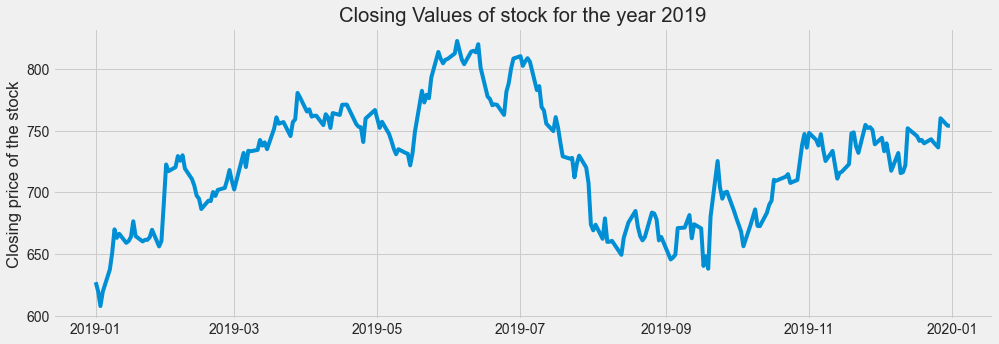

In [32]:
plt.style.use('fivethirtyeight')
plt.plot(axis2019_df['Date'],axis2019_df['Close'] )
plt.title('Closing Values of stock for the year 2019')
plt.xlabel(None)
plt.ylabel('Closing price of the stock')

Text(0, 0.5, 'Closing price of the stock')

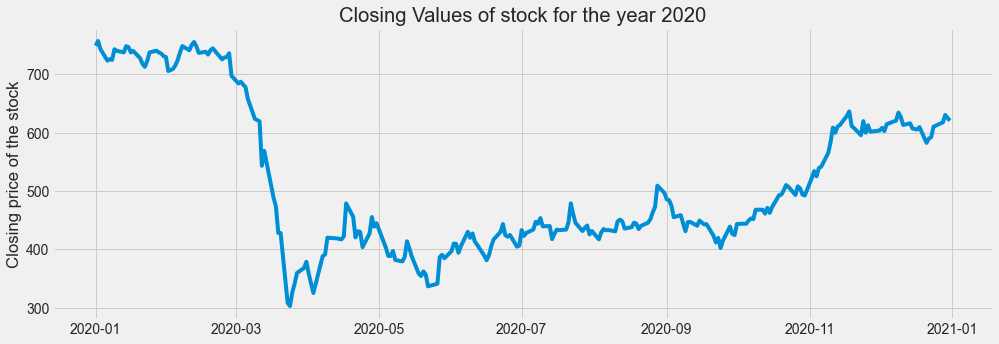

In [33]:
plt.plot(axis2020_df['Date'],axis2020_df['Close'])
plt.title('Closing Values of stock for the year 2020')
plt.xlabel(None)
plt.ylabel('Closing price of the stock')

Text(0, 0.5, 'Closing price of the stock')

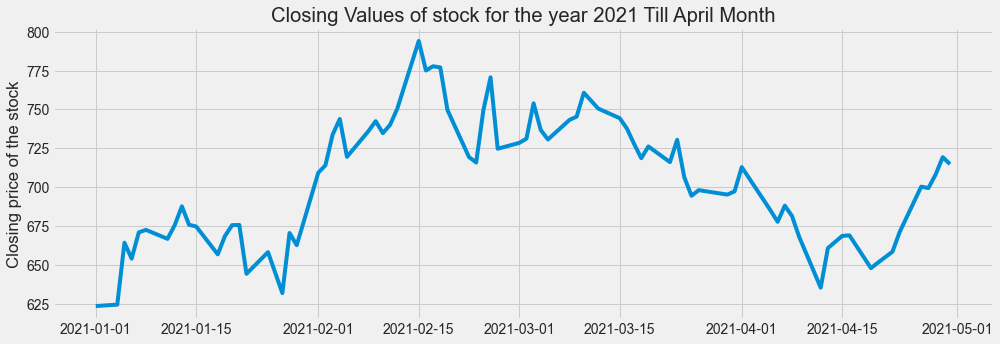

In [34]:
plt.plot(axis2021_df['Date'],axis2021_df['Close'])
plt.title('Closing Values of stock for the year 2021 Till April Month')
plt.xlabel(None)
plt.ylabel('Closing price of the stock')

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0, 0.5, 'Closing price of the stock')

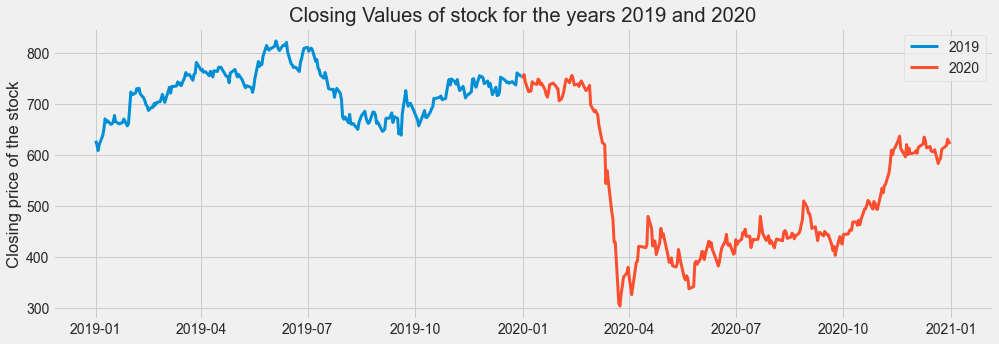

In [35]:
plt.style.use('fivethirtyeight')
plt.plot(axis2019_df['Date'], axis2019_df['Close'],linewidth=3, label = '2019')
plt.plot(axis2020_df["Date"],axis2020_df['Close'],linewidth=3, label = '2020')
plt.legend(loc='best' )
plt.title('Closing Values of stock for the years 2019 and 2020')
plt.xlabel(None)
plt.ylabel('Closing price of the stock')


In [36]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Let us save and upload our work to Jovian before continuing

## Asking and Answering Questions

In this section, we are going to answer some of the questions regarding the dataset using various data analysis libraries like Numpy, Pandas, Matplotlib and seaborn. By using the tools we can see how useful the libraries come in handy while doing Inference on a dataset.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



### Q1: What was the change in price and volume of the stock traded overtime?

Text(0, 0.5, 'Closing price of the stock')

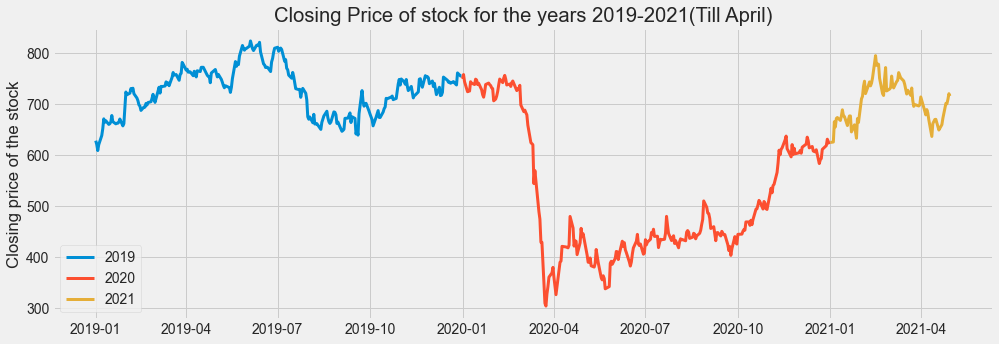

In [39]:
plt.plot(axis2019_df['Date'], axis2019_df['Close'],linewidth=3, label = '2019')
plt.plot(axis2020_df["Date"],axis2020_df['Close'],linewidth=3, label = '2020')
plt.plot(axis2021_df["Date"], axis2021_df['Close'],linewidth = 3, label = '2021')
plt.legend(loc='best' )
plt.title('Closing Price of stock for the years 2019-2021(Till April)')
plt.xlabel(None)
plt.ylabel('Closing price of the stock')

In [40]:
print('The Maximum closing price of the stock during 2019-2021 is',axis_new_df['Close'].max())
print('The Minimum closing price of the stock during 2019-2021 is',axis_new_df['Close'].min())
print('The Index for the Maximum closing price in the dataframe is',getIndexes(axis_new_df, axis_new_df['Close'].max()))
print('The Index for the Minimum closing price in the dataframe is',getIndexes(axis_new_df, axis_new_df['Close'].min()))
print(axis_new_df.iloc[104])
print(axis_new_df.iloc[303])


The Maximum closing price of the stock during 2019-2021 is 822.8
The Minimum closing price of the stock during 2019-2021 is 303.15
The Index for the Maximum closing price in the dataframe is [(105, 'Prev Close'), (104, 'Close'), (105, 'Daily Lag')]
The Index for the Minimum closing price in the dataframe is [(304, 'Prev Close'), (303, 'Close'), (304, 'Daily Lag')]
Date             2019-06-04 00:00:00
Symbol                      AXISBANK
Prev Close                    812.65
Open                          807.55
High                          827.75
Low                            805.5
Close                          822.8
Volume                       9515354
Turnover           778700415970000.0
Daily Lag                     812.65
Daily Returns              -0.012336
Year                            2019
Name: 104, dtype: object
Date             2020-03-24 00:00:00
Symbol                      AXISBANK
Prev Close                    308.65
Open                          331.95
High            

* As we can see from the above one of the two plots there was a dip in the closing price during the year 2020. The Maximum Closing price occurred on 2019-06-04(Close = 822.8). The lowest of closing price during the years occurred on 2020-03-24(Close = 303.15). This can say that the start of the pandemic has caused the steep down curve for the stock's closing price.

Text(0.5, 0, '')

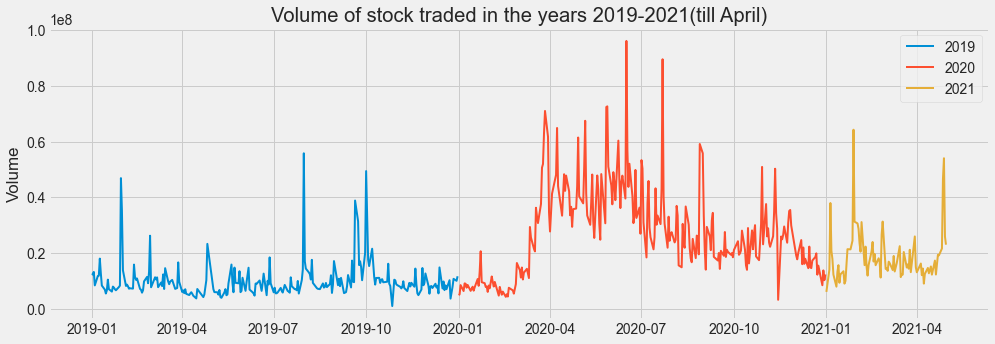

In [41]:
plt.plot(axis2019_df["Date"],axis2019_df["Volume"],linewidth=2, label = '2019')
plt.plot(axis2020_df["Date"],axis2020_df["Volume"],linewidth=2, label = '2020')
plt.plot(axis2021_df["Date"],axis2021_df["Volume"],linewidth=2, label = '2021')
plt.legend(loc='best')
plt.title('Volume of stock traded in the years 2019-2021(till April)')
plt.ylabel('Volume')
plt.xlabel(None)


In [42]:
print('The Maximum volume of the stock traded during 2019-2021 is',axis_new_df['Volume'].max())
print('The Minimum volume of the stock traded during 2019-2021 is',axis_new_df['Volume'].min())
print('The Index for the Maximum volume stock traded in the dataframe is',getIndexes(axis_new_df, axis_new_df['Volume'].max()))
print('The Index for the Minimum volume stock traded in the dataframe is',getIndexes(axis_new_df, axis_new_df['Volume'].min()))
print(axis_new_df.iloc[357])
print(axis_new_df.iloc[200])

The Maximum volume of the stock traded during 2019-2021 is 96190274
The Minimum volume of the stock traded during 2019-2021 is 965772
The Index for the Maximum volume stock traded in the dataframe is [(357, 'Volume')]
The Index for the Minimum volume stock traded in the dataframe is [(200, 'Volume')]
Date             2020-06-16 00:00:00
Symbol                      AXISBANK
Prev Close                     389.6
Open                           404.9
High                           405.0
Low                            360.4
Close                         381.55
Volume                      96190274
Turnover          3654065942305001.0
Daily Lag                      389.6
Daily Returns               0.021098
Year                            2020
Name: 357, dtype: object
Date               2019-10-27 00:00:00
Symbol                        AXISBANK
Prev Close                       708.6
Open                             711.0
High                            715.05
Low                             70

As we can see from the above graph a lot of volume of trade happened during 2020. That means the stock was transacted a lot during the year 2020. The highest Volumed of stock is traded on  2020-06-16(Volume =96190274) and the Minimum volume of the stock traded during 2019-2021 is on 2019-10-27(Volume = 965772)

### Q2: What was the daily return of the stock on average?

The daily return measures the price change in a stock's price as a percentage of the previous day's closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. we will also attempt to calculate the maximum daily return of the stock during 2019-2021.

Text(0, 0.5, 'Daily Returns of the stock')

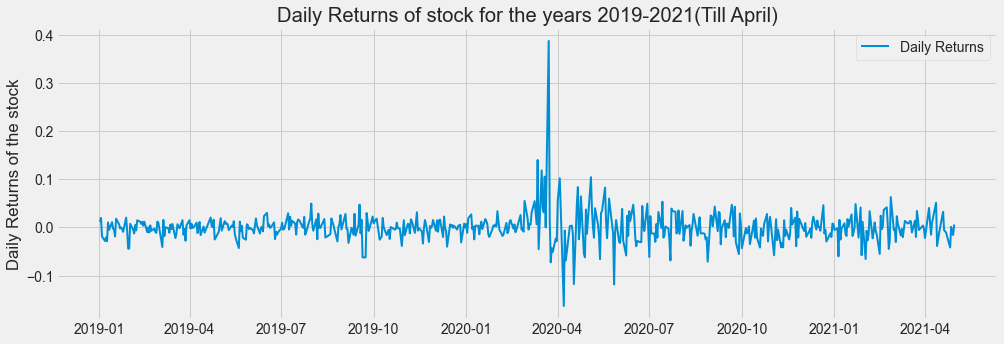

In [43]:
#axis_new_df['Daily Returns'].plot(title='Axis Bank Daily Returns')
plt.plot(axis_new_df['Date'],axis_new_df['Daily Returns'], linewidth=2 ,label = 'Daily Returns')
plt.legend(loc='best' )
plt.title('Daily Returns of stock for the years 2019-2021(Till April)')
plt.xlabel(None)
plt.ylabel('Daily Returns of the stock')

Text(0, 0.5, 'Daily Returns of the stock')

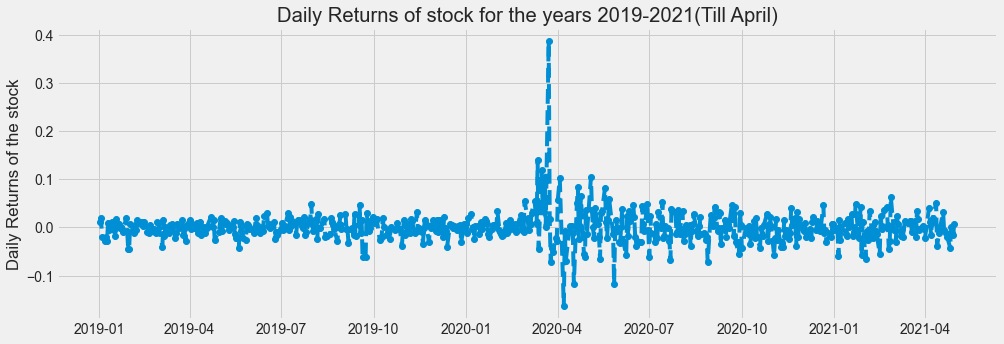

In [44]:
plt.plot(axis_new_df['Date'],axis_new_df['Daily Returns'], linestyle='--', marker='o')
plt.title('Daily Returns of stock for the years 2019-2021(Till April)')
plt.xlabel(None)
plt.ylabel('Daily Returns of the stock')

In [45]:
print('The Maximum daily return during the years 2020 is',axis_new_df['Daily Returns'].max())
index = getIndexes(axis_new_df, axis_new_df['Daily Returns'].max())
axis_new_df.iloc[302]

The Maximum daily return during the years 2020 is 0.3871699335817269


Date             2020-03-23 00:00:00
Symbol                      AXISBANK
Prev Close                    428.15
Open                          385.35
High                           392.0
Low                            302.0
Close                         308.65
Volume                      37622791
Turnover          1253563689110000.0
Daily Lag                     428.15
Daily Returns                0.38717
Year                            2020
Name: 302, dtype: object

In [46]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos = list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

As we can see from the plot there were high daily returns for the stock around late March 2020 and then there was ups and downs from April- July 2020 . we can see that the most changes in daily returns occurred during April 2020 - July 2020 and at other times the daily returns were almost flat. The maximum daily returns for the stock during 2019-2021 occurred on 2020-03-23(observed from the pandas table above).

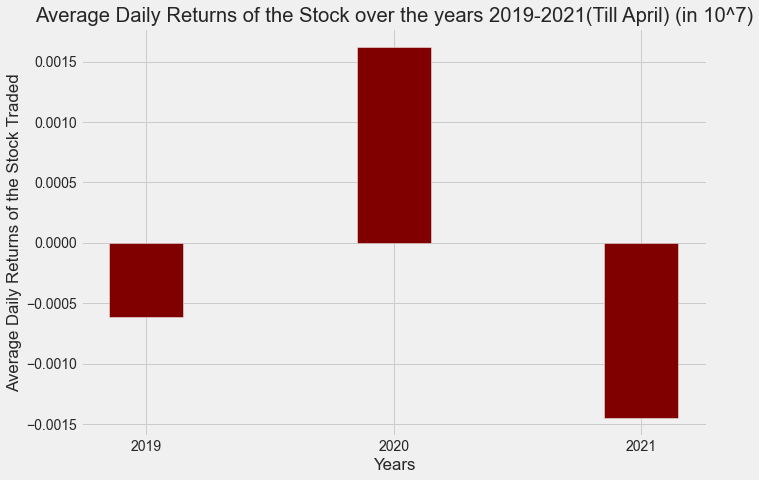

In [47]:
Avgdailyret_2019 =axis2019_df['Daily Returns'].sum()/len(axis2019_df['Daily Returns'])
Avgdailyret_2020 =axis2020_df['Daily Returns'].sum()/len(axis2020_df['Daily Returns'])
Avgdailyret_2021 =axis2021_df['Daily Returns'].sum()/len(axis2021_df['Daily Returns'])

# create a dataset
data_dailyret = {'2019': Avgdailyret_2019, '2020':Avgdailyret_2020, '2021':Avgdailyret_2021}
Years = list(data_dailyret.keys())
Avgdailyret = list(data_dailyret.values())

# plotting a bar chart
plt.figure(figsize=(10, 7))
plt.bar(Years, Avgdailyret, color ='maroon',width = 0.3)
plt.xlabel("Years")
plt.ylabel("Average Daily Returns of the Stock Traded")
plt.title("Average Daily Returns of the Stock over the years 2019-2021(Till April) (in 10^7)")
plt.show()
        

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


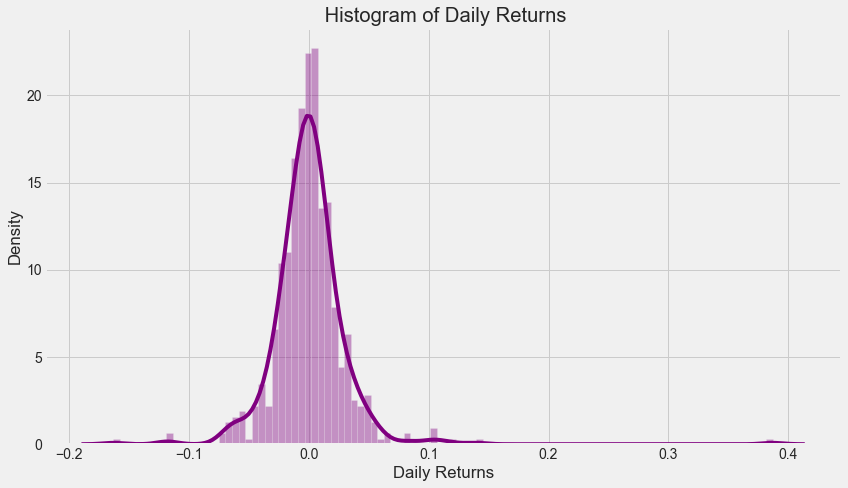

In [48]:
plt.figure(figsize=(12, 7))
sns.distplot(axis_new_df['Daily Returns'].dropna(), bins=100, color='purple')
plt.title(' Histogram of Daily Returns')
plt.tight_layout()

### Q3: What is the Average Trading volume of the stock for past three years?

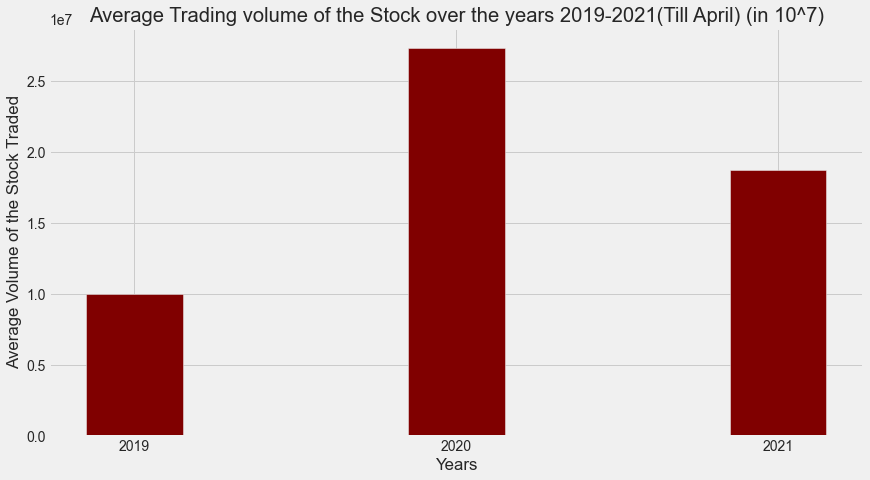

In [49]:
Avgvol_2019 =axis2019_df['Volume'].sum()/len(axis2019_df['Volume'])
Avgvol_2020 =axis2020_df['Volume'].sum()/len(axis2020_df['Volume'])
Avgvol_2021 =axis2021_df['Volume'].sum()/len(axis2021_df['Volume'])
# create a dataset
data_volume = {'2019': Avgvol_2019, '2020':Avgvol_2020, '2021':Avgvol_2021}
Years = list(data_volume.keys())
AvgVol = list(data_volume.values())
# plotting a bar chart
plt.figure(figsize=(13, 7))
plt.bar(Years, AvgVol, color ='maroon',width = 0.3)
plt.xlabel("Years")
plt.ylabel("Average Volume of the Stock Traded")
plt.title("Average Trading volume of the Stock over the years 2019-2021(Till April) (in 10^7)")
plt.show()
        

From the above plot we can say that more volume of the Axis Bank stock is traded during the year 2020. We can see a significant rise in the trading volume of the stock from 2019 to 2020. 

### Q4: What is the Average Closing price of the stock for past three years?

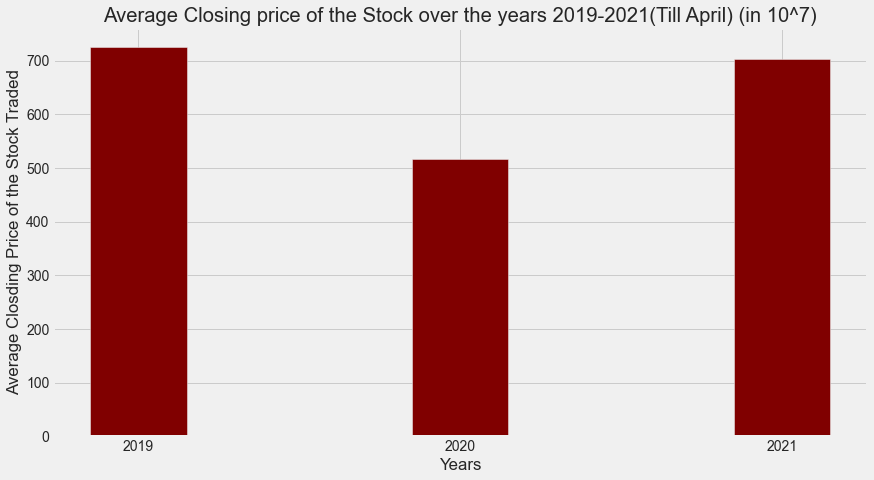

In [50]:
Avgclose_2019 =axis2019_df['Close'].sum()/len(axis2019_df['Close'])
Avgclose_2020 =axis2020_df['Close'].sum()/len(axis2020_df['Close'])
Avgclose_2021 =axis2021_df['Close'].sum()/len(axis2021_df['Close'])
# create a dataset
data_volume = {'2019': Avgclose_2019, '2020':Avgclose_2020, '2021':Avgclose_2021}
Years = list(data_volume.keys())
AvgClose = list(data_volume.values())
# plotting a bar chart
plt.figure(figsize=(13, 7))
plt.bar(Years, AvgClose, color ='maroon',width = 0.3)
plt.xlabel("Years")
plt.ylabel("Average Closding Price of the Stock Traded")
plt.title("Average Closing price of the Stock over the years 2019-2021(Till April) (in 10^7)")
plt.show()
        

We have seen the Trading Volume of the stock is more during the year 2020. In contrast, the Year 2020 has the lowest average closing price among the other two. But for the years 2019 and 2021 the Average closing price is almost same, there is not much change in the value.

## Inferences and Conclusion

Inferences : The above data analysis is done on the data set of stock quotes for AXIS BANK during the years 2019-2021. From the Analysis we can say that during the year 2020 there has been a lot of unsteady growth, there has been rise in the volume of stock traded on the exchange, that means there has been a lot of transactions of the stock. The stock has seen a swift traffic in buy/sell during the year 2020 and has fallen back to normal in the year 2021. In contrast to the volume of the stock the closing price of the stock has decreased during the year 2020, which can be concluded as the volume of the stock traded has no relation to the price change of the stock(while most people think there can be a correlation among the two values). The price decrease for the stock may have been due to the pandemic rise in India during the year 2020. 

## References and Future Work

Future Ideas for the Analyis:
* I am planning to go forward with this basic Analysis of the AXISBANK stock quotes and build a Machine Learning model predicting the future stock prices.
* I plan to automate the Data Analysis process for every stock in the NIFTY50 Index by defining reusable functions and automating the Analysis procedures.
* Study more strong correlations between the different quotes of the stock and analyze how and why they are related in that fashion. 

REFRENCES/LINKS USED FOR THIS PROJECT :
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
* https://stackoverflow.com/questions/16683701/in-pandas-how-to-get-the-index-of-a-known-value
* https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587
* https://thispointer.com/python-find-indexes-of-an-element-in-pandas-dataframe/
* https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#timeseries-friendly-merging
* https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
* https://towardsdatascience.com/financial-analytics-exploratory-data-analysis-of-stock-data-d98cbadf98b9
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
* https://pandas.pydata.org/docs/reference/api/pandas.merge.html
* https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe
* https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas
* https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
* https://queirozf.com/entries/matplotlib-examples-displaying-and-configuring-legends
* https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html
* https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html
* https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
* https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
* https://www.investopedia.com/articles/investing/093014/stock-quotes-explained.asp
* https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-datefield-using-python-pandas
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
* https://note.nkmk.me/en/python-pandas-dataframe-rename/
* https://stackoverflow.com/questions/24748848/pandas-find-the-maximum-range-in-all-the-columns-of-dataframe
* https://stackoverflow.com/questions/29233283/plotting-multiple-lines-in-different-colors-with-pandas-dataframe
* https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html
* https://www.geeksforgeeks.org/python-pandas-extracting-rows-using-loc/